# Dropout - Ridge Regression Demo


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We're trying to find a $w \in R^d$ that minimizes $L = \frac{1}{2}||y - Xw||_2^2$
The SGD gradient is then 
$$\nabla_w L = x_ix_i^Tw - y_ix_i$$


In [2]:
def least_squares_sgd_dropout(X, y, step_size, num_itrs, p):
    '''
    Performs dropout with probability p for the least squares problem
    Input:  X is a N x d matrix
            y: N x 1 vector
            step_size: size of step to take
            num_itrs: number of SGD steps to take
            p: probability of keeping something
    Output: w: d x1 vector
    '''
    w = np.zeros([X.shape[1]])
    
    for itr in range(num_itrs):
        
        if itr == num_itrs//2:
            step_size /= 5
        if itr == num_itrs*3//4:
            step_size /= 5
        i = np.random.choice(X.shape[0])
        x_i = X[i, :].copy()
        x_i[np.where(np.random.random(X.shape[1])>p)] = 0
        
        grad = x_i * (x_i @ w - y[i])  # @ is matrix multiplication
        w -= step_size * grad
    return w

def ridge_regression(X, y, lambda_):
    return np.linalg.solve(X.T @ X + lambda_*np.eye(X.shape[1]), X.T @ y)

# Part A
Demonstration that dropout and ridge regression are the same for a certain class of problems

In [3]:
# for this part, X needs to have orthogonal columns
X, _ = np.linalg.qr(np.random.random([20, 2])*20)

w = np.random.normal(scale=10.0, size=[2])
y = X.dot(w) + np.random.normal(scale=5.0, size=[20])

In [8]:
p_vals = np.arange(0.6, 0.9, 0.1)

dropout_weights = [[p*least_squares_sgd_dropout(X, y, 0.05, 20000, p) for p in p_vals] for _ in range(5)]
dropout_weights = np.average(np.array(dropout_weights), axis=0)

rr_weights = np.array([ridge_regression(X, y, (1-p) / p).reshape(2) for p in p_vals])

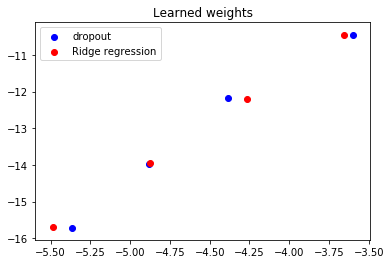

In [12]:
plt.title("Learned weights")
plt.scatter(dropout_weights[:,0], dropout_weights[:,1], c='b', label="dropout")
plt.scatter(rr_weights[:,0], rr_weights[:,1], c='r', label="Ridge regression")
plt.legend(loc=2)
plt.show()

# Part B

Purpose of this problem is to show the connection between bagging and algorithms besides trees.
    This weighted average is something that you can't pull off with trees

In [15]:
def weighted_sum(weights, p):
    # 1st is 0
    # 2nd has just first col
    # 3rd has just second col
    # fourth has both cols
    # p is probability of keeping
    result = np.zeros(2)
    result += p *(1 - p) * weights[1,:]
    result += p *(1 - p) * weights[2,:]
    result += p * p * weights[3,:]
    return result

def compare_methods(X, y):
    X_1 = X[:,0].copy()
    X_2 = X[:,1].copy()

    w1 = X_1.T @ y / (X_1 @ X_1)
    w2 = X_2.T @ y / (X_2 @ X_2)
    w3 = ridge_regression(X, y, 0)
    weights = np.array([[0,0], [w1, 0], [0, w2], w3])
    weighted_bagged_w = np.array([weighted_sum(weights, p) for p in np.arange(0.01, 0.99, 0.05)])
    
    rr_w = np.array([ridge_regression(X, y, penalty).reshape(2) for penalty in np.arange(0, 10, 1)])
    
    
    plt.scatter(weights[:,0].reshape(4), weights[:,1].reshape(4), c='b', label="Bagged LR (individual)")
    plt.scatter(weighted_bagged_w[:,0], weighted_bagged_w[:,1], c='r', label="Bagged LR (weighted sum)")
    plt.scatter(rr_w[:,0], rr_w[:,1], c='g', label="Ridge and dropout")
    plt.legend()
    plt.show()
    

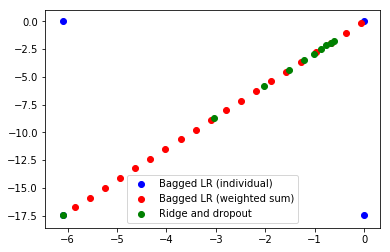

In [16]:
# X1 = np.random.random([100, 2])*20
# w1 = np.random.normal(scale=10.0, size=[2, 1])
# y1 = X.dot(w) + np.random.normal(scale=5.0, size=[100, 1])
compare_methods(X, y)

In [ ]:
# should also do the augmented dataset thing

# 3 curves: ridge, tikhonov (dropout), bagged

# if it's easy enough, make a visualization of convergence sgd vs dropout
# also have a curve with 4 corners (probability simplex), and the curve shows the 
# value of the w for different p values

# also have an example of ill-conditioned one

# have students do this

# compare the weight shared dropout vs doing a separate w for each problem, then doing
# weighted average

# can do sample bagging (don't exhaustively make the models)


# have them comment on which behaves better